# Workshop 2: Præprocessering og Analyse af Tidsseriedata
Fag: AI & Data, 2. Semester
Gruppemedlemmer : Peter & Jonas
Dato: 14-04-2025

Trin 1: Dataindlæsning
Først importerer vi det nødvendige bibliotek pandas til datahåndtering samt indlæser dataset.

In [1]:
import pandas as pd

file_path = r"DailyDelhiClimateTrain.csv"
df = pd.read_csv(file_path)

Trin 2: Dataoversigt
For at få et hurtigt indblik i datasættets struktur og indhold anvendes .head(). 

In [2]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Trin 3: Forberedelse af visualisering og Indledende Plot
Her importeres matplotlib.pyplot biblioteket for at muliggøre datavisualisering. Der oprettes et sæt af fire plots. Dette giver en indledende visuel inspektion af de rå klimadata over tid.

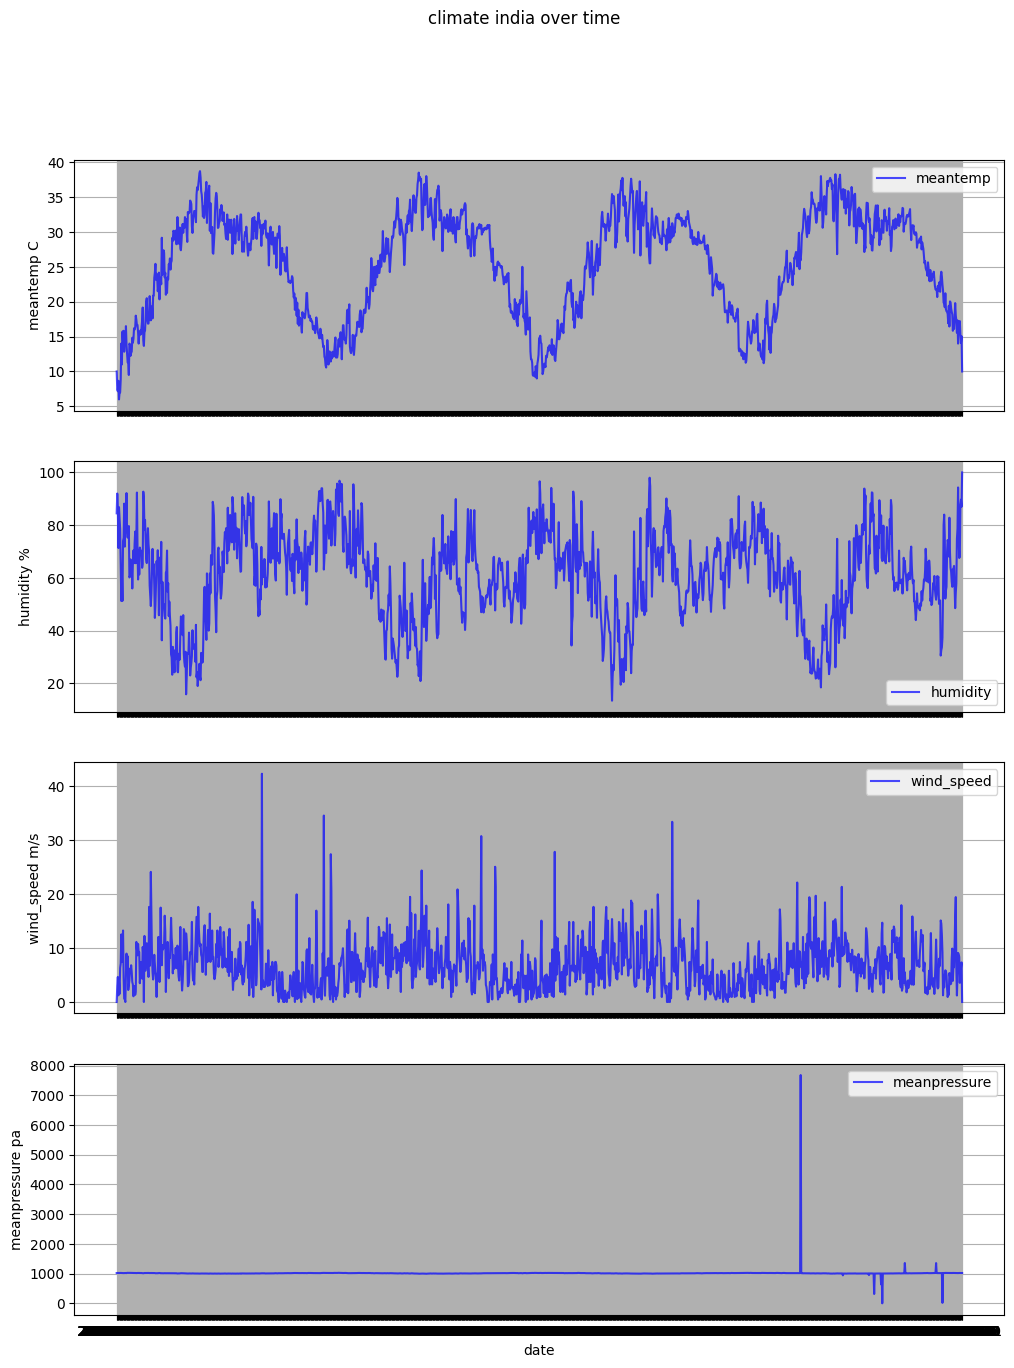

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 15), sharex=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
features_meantemp = features[0]
meantemp_array = df[features_meantemp].to_numpy()
titles = ['meantemp C', 'humidity %', 'wind_speed m/s', 'meanpressure pa']

for i, feature in enumerate(features):
    axes[i].plot(df['date'], df[feature], label=feature, color='b', alpha=0.7)
    axes[i].set_ylabel(titles[i])
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("date")
plt.suptitle("climate india over time")
plt.show()


Trin 4: Oprettelse af Low-Pass Filter
Et simpelt Low Pass Filter laves. Filterets længde, m, sættes til 100. Filteret oprettes bestående af m et-taller, som derefter divideres med m. Dette sikrer, at gennemsnittet beregnes korrekt over et vindue på 100 datapunkter. Filteret er designet til at udglatte tidsseriedata og reducere højfrekvent støj.

In [4]:
import numpy as np


#lowpassfilter
m = 100

filter = np.ones(m) / m

Trin 5: Visning af Rå Temperaturdata
Denne kodecelle viser indholdet af meantemp_array, som blev oprettet i Trin 3. Dette repræsenterer de rå temperaturmålinger og vil blive brugt som input til konvolutionsprocessen i det næste trin.

In [5]:
meantemp_array

array([10.        ,  7.4       ,  7.16666667, ..., 14.0952381 ,
       15.05263158, 10.        ])

Trin 6: Anvendelse af Filter via Konvolution
Konvolution (np.convolve) bruges til at anvende det low pass filter (defineret i Trin 4) på det rå temperatur data (fra Trin 5). Resultatet, er en ny tidsserie for temperaturen, hvor kortsigtet støj er blevet mindsket, hvilket gør langsigtede tendenser mere tydelige.

In [6]:
vector = np.convolve(meantemp_array, filter)

Trin 7: Visualisering af Filtreret Temperatur
Resultatet af konvolutionen fra Trin 6 visualiseres. En ny figur oprettes med matplotlib, og den filtrerede temperaturtidsserie plottes. Dette plot viser den udglattede temperaturkurve og demonstrerer effekten af det anvendte low-pass filter ved at sammenligne med det rå plot fra Trin 3.

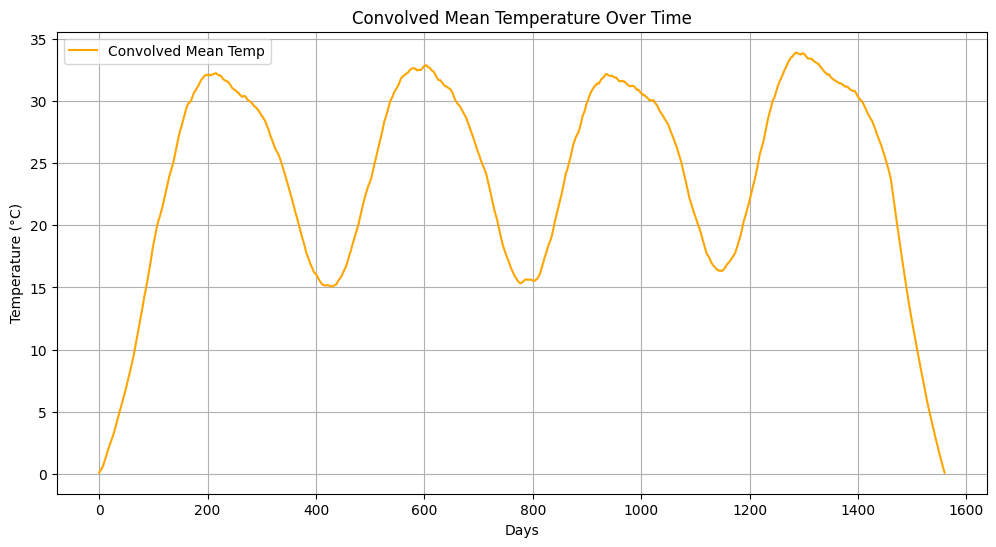

In [7]:
# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(vector, label='Convolved Mean Temp', color='orange')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.title('Convolved Mean Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

Trin 8: Frekvensanalyse med FFT
Fast Fourier Transform (FFT) beregnes for de oprindelige temperaturdata. FFT transformerer tidsserien fra tidsdomænet til frekvensdomænet, hvilket afslører de dominerende frekvenser i signalet. Plottet viser amplituden (absolutværdien) af FFT-resultatet mod frekvensen. Kun den positive halvdel af frekvenserne plottes, da spektret for reelle data er symmetrisk. X-aksen begrænses (xlim) for at fokusere på de lave frekvenser, hvor man typisk finder langsomme svingninger som årstider.

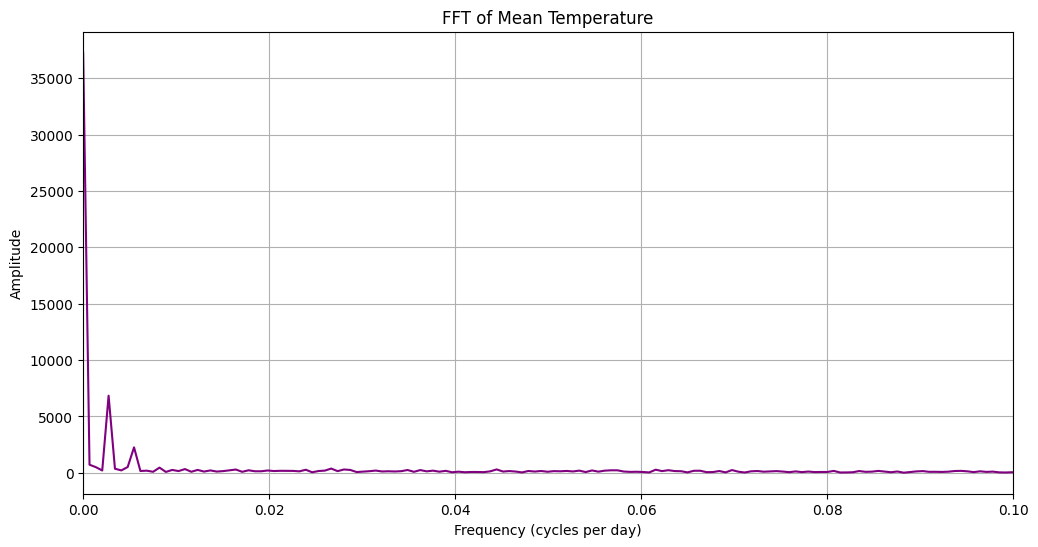

In [8]:
# Compute the FFT
fft_result = np.fft.fft(meantemp_array)
frequencies = np.fft.fftfreq(len(meantemp_array), d=1)  # d=1 means daily samples

# Only plot the positive half of frequencies
half_n = len(frequencies) // 2
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:half_n], np.abs(fft_result)[:half_n], color='purple')

plt.title('FFT of Mean Temperature')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Amplitude')
plt.xlim([0, 0.1])  # Zoom in on the low-frequency range
plt.grid(True)
plt.show()

Trin 9: Zero-padding og FFT af Filteret
Denne kodeblok demonstrerer zero-padding af low pass. Dette plot viser, hvordan filteret påvirker forskellige frekvenser: det dæmper høje frekvenser (støj) og bevarer lave frekvenser (signal/tendenser), hvilket er karakteristisk for et low-pass filter.

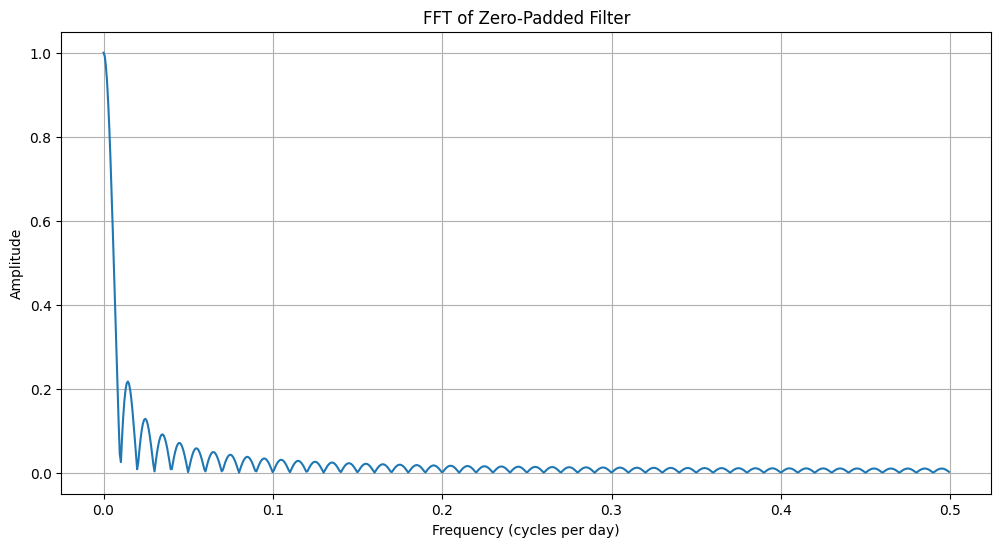

In [9]:
# Suppose you want to pad it to the same length as meantemp_array
desired_length = 1462  # Example, set this to len(meantemp_array) if available

# Zero-padding
padded_filter = np.pad(filter, (0, desired_length - len(filter)), 'constant')

# Compute FFT of the zero-padded filter
fft_filter = np.fft.fft(padded_filter)
frequencies = np.fft.fftfreq(len(padded_filter), d=1)

# Plot the FFT (magnitude)
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_filter)[:len(frequencies)//2])
plt.title('FFT of Zero-Padded Filter')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Konklusion
Først blev dataene indlæst og visualiseret for at identificere støj og mønstre. Derefter blev et lav pas filter anvendt via konvolution for at reducere kortsigtet støj i temperaturdataene, hvilket blev vi fik valideret visuelt. Til sidst blev FFT brugt til at analysere frekvenskomponenterne i de oprindelige temperaturdata, hvilket kan afsløre periodiske mønstre som årstidsvariationer. FFT blev også anvendt på det zero-paddede filter for at visualisere dets frekvensrespons og bekræfte dets low-pass egenskaber. Samlet set illustrerer workshoppen, hvordan filtrering og frekvensanalyse kan bruges til at forbedre og forstå tidsseriedata.